# **Seniment Analysis of Twitter Dataset**

This project aims to perform sentiment analysis on Twitter text data. Sentiment analysis is the process of determining the sentiment (e.g., positive, negative, and neutral) expressed in a piece of text. We will use a dataset in CSV format and employ the TF-IDF vectorization technique and a SVM and Random Forest models for classification.


##Outline:



1.   Load the datasets and do Exploratory Data Analysis.
2.   Visualize the datasets and do preprocessing (converting to lower case, tokenizing, stemming etc.)
3.   Implement the TF-IDF Technique on the preprocessed data.
4.   Train ML models including Support Vector Classifier and Random Forest Classifier.
5.   Evaluate the performance of these models and compare their performance.
5.   Choose the model that performs best and dump the model using pickle.
6.   Conclusion.


## About the Dataset
Twitter Sentiment Analysis Dataset is accessible on the following link:

https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/data

Overview: This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

The training and validation data is provided separately in the data set.

Usage: twitter_training.csv as the training set and twitter_validation.csv as the validation set. Top 1 classification accuracy is used as the metric.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

## Loading the dataset

Load the training dataset from a CSV file. The dataset has four columns: one for the text data, one for the sentiment labels and two more.

In [ ]:
# Load the training dataset
dataset_train = pd.read_csv('/content/twitter_training.csv', header=None)  # No header in the original file
dataset_train.shape

(15837, 4)

In [ ]:
# Load the validation dataset
dataset_val =pd.read_csv('/content/twitter_validation.csv', header=None)  # No header in the original file
dataset_val.shape

(1000, 4)

In training dataset, there are 4 columns and 74682 rows and in validation dataset there are 4 columns and 1000 rows.

# Data Preprocessing of Training and Validation data

Preprocess the text data to clean and prepare it for vectorization. This includes adding headers, converting to lowercase, and removing stop words.

In [ ]:
dataset_train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
dataset_train.tail()

,0,1,2,3
15832,3108,Dota2,Negative,She wtf
15833,3108,Dota2,Negative,wtf
15834,3109,Dota2,Irrelevant,ICYMI: @BLASTDota finds sponsor in @KITKAT. . ...
15835,3109,Dota2,Irrelevant,ICYMI: @ BLASTDota finds sponsor in @ KITKAT. ...
15836,3109,Dota2,Irrelevant,ICYMI: @ BLASTDota finds a sponsor in @ KITKAT...


In [ ]:
dataset_val.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
dataset_val.tail()

,0,1,2,3
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


## Adding headers in the dataset:

We observe that the header was missing from the datasets (both from train and validation). So, we add headers to both the datasets and form two new csv files named: 'twitter_training_data_with_header.csv' and 'twitter_validation_data_with_header.csv

From now on, we work with these newly generated datasets.

In [ ]:
# Define the header
header = ["Twitter ID", "Source", "Label","Comment"]

# Adding the header
dataset_train.columns = header
dataset_val.columns=header

# Save the file with the new header
dataset_train.to_csv('twitter_training_data_with_header.csv', index=False)
dataset_val.to_csv('twitter_validation_data_with_header.csv', index=False)

In [ ]:
dataset_train.head(5)

,Twitter ID,Source,Label,Comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15837 entries, 0 to 15836
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Twitter ID  15837 non-null  int64 
 1   Source      15837 non-null  object
 2   Label       15837 non-null  object
 3   Comment     15676 non-null  object
dtypes: int64(1), object(3)
memory usage: 495.0+ KB


In [ ]:
dataset_val.head(5)

,Twitter ID,Source,Label,Comment
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
dataset_val.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Twitter ID  1000 non-null   int64 
 1   Source      1000 non-null   object
 2   Label       1000 non-null   object
 3   Comment     1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


#Exploratory Data Analysis

In [ ]:
# check statistical measures
dataset_train.describe(include = 'all')

,Twitter ID,Source,Label,Comment
count,15837.000000,15837,15837,15676
unique,NaN,7,4,14816
top,NaN,CallOfDutyBlackopsColdWar,Negative,It is not the first time that the EU Commissio...
freq,NaN,2376,4674,37
mean,5596.944308,NaN,NaN,NaN
std,4482.661200,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,1878.000000,NaN,NaN,NaN
50%,2958.000000,NaN,NaN,NaN
75%,9321.000000,NaN,NaN,NaN


In [ ]:
# check for null values
dataset_train.isnull().sum()

Twitter ID      0
Source          0
Label           0
Comment       161
dtype: int64

In [ ]:
# check unique values
dataset_train.nunique()

Twitter ID     2640
Source            7
Label             4
Comment       14816
dtype: int64

In [ ]:
dataset_train.nunique()['Label']

4

In [ ]:
dataset_train.value_counts('Label')

Label
Negative      4674
Positive      4608
Neutral       3612
Irrelevant    2943
Name: count, dtype: int64

<Axes: xlabel='Label'>

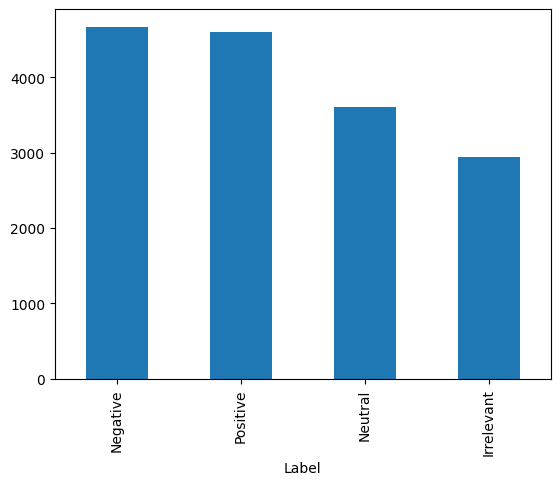

In [ ]:
dataset_train.value_counts('Label').plot(kind='bar')

#Data visualization

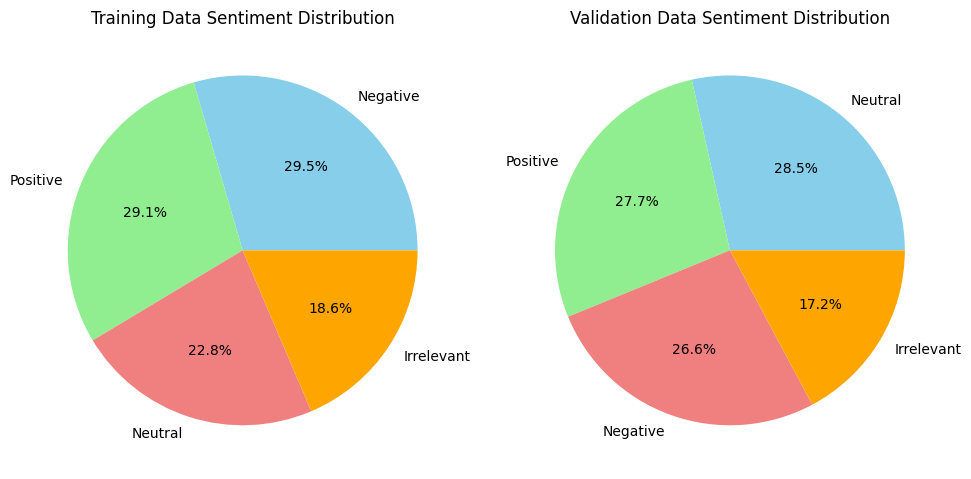

In [ ]:
# Calculate the number of sentiment labels in training data and validation data
train_sentiment_counts = dataset_train['Label'].value_counts()
valid_sentiment_counts = dataset_val['Label'].value_counts()

# Draw a pie chart for the training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(train_sentiment_counts, labels=train_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')

# Draw a pie chart for the valid data
plt.subplot(1, 2, 2)
plt.pie(valid_sentiment_counts, labels=valid_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')

plt.tight_layout()
plt.show()

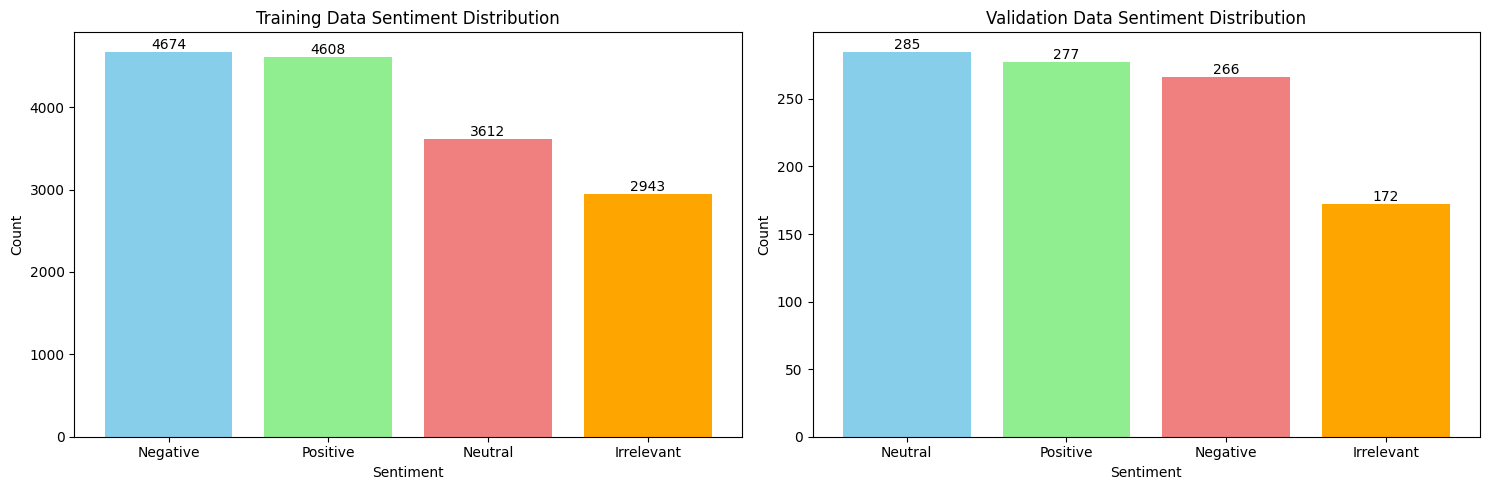

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(train_sentiment_counts.index, train_sentiment_counts.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display quantity in each column
for i, count in enumerate(train_sentiment_counts.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')


plt.subplot(1, 2, 2)
plt.bar(valid_sentiment_counts.index, valid_sentiment_counts.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display quantity in each column
for i, count in enumerate(valid_sentiment_counts.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Data Preprocessing of Training and Validation data

Preprocess the text data to clean and prepare it for vectorization. This includes removing Null values, converting to lowercase, and removing stop words.

In [ ]:
dataset_train.value_counts('Comment')

Comment
                                                                                                                                                                                                                                                                      37
At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care.    37
It is not the first time that the EU Commission has taken such a step.                                                                                                                                                                                                37
<unk>                                                                                                                                                                                                

In [ ]:
train_df = dataset_train.dropna(subset=['Comment'])


In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
train_df.Comment[0]

'im getting on borderlands and i will murder you all ,'

In [ ]:
word_tokenize(train_df.Comment[0])

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'murder',
 'you',
 'all',
 ',']

In [ ]:
import string

train_df['Comment'] = train_df['Comment'].astype(str)

<ipython-input-32-71b692cacbcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Comment'] = train_df['Comment'].astype(str)


In [ ]:
# Preprocessing function
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [ ]:
train_df['Comment'] = train_df['Comment'].astype(str)
train_df['Comment'] = train_df['Comment'].apply(preprocess_text)
train_df.head(5)

<ipython-input-34-da21a8ebbb6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Comment'] = train_df['Comment'].astype(str)
<ipython-input-34-da21a8ebbb6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Comment'] = train_df['Comment'].apply(preprocess_text)


,Twitter ID,Source,Label,Comment
0,2401,Borderlands,Positive,im getting borderlands murder
1,2401,Borderlands,Positive,coming borders kill
2,2401,Borderlands,Positive,im getting borderlands kill
3,2401,Borderlands,Positive,im coming borderlands murder
4,2401,Borderlands,Positive,im getting borderlands murder


In [ ]:
dataset_val['Comment'] = dataset_val['Comment'].astype(str)
dataset_val['Comment'] = dataset_val['Comment'].apply(preprocess_text)
X_val = dataset_val['Comment']
y_val = dataset_val['Label']

In [ ]:
X_val.head(5)

0    mentioned facebook struggling motivation go ru...
1    bbc news amazon boss jeff bezos rejects claims...
2    microsoft pay word functions poorly samsungus ...
3    csgo matchmaking full closet hacking truly awf...
4    president slapping americans face really commi...
Name: Comment, dtype: object

##Splitting Training dataset in Train and Test

Split the data into training and testing sets to evaluate the model's performance.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df['Comment'], train_df['Label'], test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12540,)
(3136,)
(12540,)
(3136,)


In [ ]:
# Ensure that X_train and X_test are of type str
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Vectorizing the Text Data and Training ML Models
Convert the text data into numerical features using the TF-IDF vectorization technique.

Train following two ML models:


*   Support Vector Classifier
*   Random Forest Classifier


Evaluate the performance of these two models.



##Model 1: SVC

In [ ]:
# Model selection and training
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

We use TfidfVectorizer layer while building the model pipeline.

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a statistical measure used in text mining and information retrieval to evaluate the importance of a word in a document relative to a collection of documents (also known as a corpus). It balances the frequency of words with how unique they are across the corpus, giving higher scores to words that are frequent in a document but rare across the corpus.

In [ ]:
# Define the model pipeline
model_pipeline_svc = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=None)), # Vectorize the data using TF-IDF
    ('svm', SVC(kernel='linear'))
])

# Train the model
model_pipeline_svc.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', SVC(kernel='linear'))])

## Evaluating the SVC Model
Evaluate the model's performance on the test set using accuracy and classification report metrics.

In [ ]:
# Predict labels for the validation data using the trained model
y_pred_val_svc = model_pipeline_svc.predict(X_val)

# Evaluate the model's performance on the validation data
accuracy_val_svc = accuracy_score(y_val, y_pred_val_svc)
report_val_svc = classification_report(y_val, y_pred_val_svc)

print("Validation Accuracy:", accuracy_val_svc)
print("Validation Classification Report:\n", report_val_svc)

Validation Accuracy: 0.53
Validation Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.38      0.50      0.43       172
    Negative       0.58      0.59      0.59       266
     Neutral       0.56      0.41      0.47       285
    Positive       0.58      0.62      0.60       277

    accuracy                           0.53      1000
   macro avg       0.52      0.53      0.52      1000
weighted avg       0.54      0.53      0.53      1000



In [ ]:
# Predict on the test set
y_pred_svc = model_pipeline_svc.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)

print("Accuracy on test data:", accuracy_svc)
print("Classification Report on test data:\n", report_svc)

Accuracy on test data: 0.8883928571428571
Classification Report on test data:
               precision    recall  f1-score   support

  Irrelevant       0.89      0.82      0.85       566
    Negative       0.91      0.90      0.91       895
     Neutral       0.94      0.87      0.91       730
    Positive       0.83      0.94      0.88       945

    accuracy                           0.89      3136
   macro avg       0.89      0.88      0.89      3136
weighted avg       0.89      0.89      0.89      3136



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# y_pred contains the predicted labels and y_test contains the true labels
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

print("Accuracy:", accuracy_svc)
print("Precision:", precision_svc)
print("Recall:", recall_svc)
print("F1-score:", f1_svc)

Accuracy: 0.8883928571428571
Precision: 0.8917377758874526
Recall: 0.8883928571428571
F1-score: 0.8884748350772868


## Model 2: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model pipeline with Random Forest classifier
model_pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

# Train the model
model_pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

## Evaluating the Random Forest Model
Evaluate the model's performance on the test set using accuracy and classification report metrics.

In [ ]:
# Predict labels for the validation data using the trained model
y_pred_val_rf = model_pipeline_rf.predict(X_val)

# Evaluate the model's performance on the validation data
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
report_val_rf = classification_report(y_val, y_pred_val_rf)

print("Validation Accuracy:", accuracy_val_rf)
print("Validation Classification Report:\n", report_val_rf)

Validation Accuracy: 0.53
Validation Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.38      0.35      0.37       172
    Negative       0.55      0.62      0.58       266
     Neutral       0.61      0.38      0.47       285
    Positive       0.54      0.70      0.61       277

    accuracy                           0.53      1000
   macro avg       0.52      0.52      0.51      1000
weighted avg       0.53      0.53      0.52      1000



In [ ]:
# Predict on the test set
y_pred_rf = model_pipeline_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test,y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

Accuracy: 0.9094387755102041
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.94      0.84      0.88       566
    Negative       0.92      0.93      0.93       895
     Neutral       0.95      0.88      0.91       730
    Positive       0.86      0.95      0.90       945

    accuracy                           0.91      3136
   macro avg       0.92      0.90      0.91      3136
weighted avg       0.91      0.91      0.91      3136



In [ ]:
# y_pred contains the predicted labels and y_test contains the true labels
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Accuracy: 0.9094387755102041
Precision: 0.9121121905106727
Recall: 0.9094387755102041
F1-score: 0.9092822206769302


## Conclusion:

In this project, we successfully performed sentiment analysis on text data using TF-IDF vectorization and a two ML models. We covered data loading, preprocessing, visualization, vectorization, model training, and evaluation.

The Random Forest Classifier model performs best with an accuracy of more that 90% on the test set.

#Save the Trained Model
Use joblib to serialize and save the trained model to a file:

In [ ]:
from joblib import dump

dump(model_pipeline_rf, 'model_NLP_sentiment_analysis.pkl')

['model_NLP_sentiment_analysis.pkl']

Download the model file from Google Colab to local machine

In [ ]:
from google.colab import files

files.download('model_NLP_sentiment_analysis.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>